# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

Lastly, we need to clean up salary data. 
1. Some of the salaries are not yearly but hourly, these will be useful to us for now
2. The salaries are given as text and usually with ranges.

#### Filter out the salaries that are not yearly (filter those that refer to hour)

In [1]:
## YOUR CODE HERE

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

### Save your results as a CSV

In [2]:
## YOUR CODE HERE

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [3]:
BASE_URL = "/Users/ryangin/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-04/assets/indeed-scraped-job-postings.csv"

In [4]:
## YOUR CODE HERE
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')

In [5]:
## YOUR CODE HERE
df = pd.read_csv(BASE_URL)
df.head()

,city,company,salary,summary,title,parsed_salary
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000.0
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000.0
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000.0
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000.0
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000.0


In [6]:
df.dtypes

city              object
company           object
salary            object
summary           object
title             object
parsed_salary    float64
dtype: object

In [7]:
df.shape

(4791, 6)

In [8]:
df.describe()

,parsed_salary
count,4789.000000
mean,66183.785550
std,64348.141986
min,2333.000000
25%,5950.000000
50%,74550.000000
75%,130000.000000
max,300000.000000


In [9]:
Top_Salary = df.sort_values(by = 'parsed_salary', ascending = False)
Top_Salary.head(10)

,city,company,salary,summary,title,parsed_salary
5,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000.0
13,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000.0
427,New+York,Averity,"$200,000 - $300,000 a year",ContactMichael Pachella (michael.pachella@aver...,Quantitative Analyst (Big Data Focus) at $10+ ...,250000.0
25,San+Francisco,Jobspring Partners,"$180,000 - $275,000 a year",This is an opportunity to lead a team of talen...,Vice President Engineering (Big Data/ Machine ...,227500.0
42,San+Francisco,Jobspring Partners,"$180,000 - $275,000 a year",This is an opportunity to lead a team of talen...,Vice President Engineering (Big Data/ Machine ...,227500.0
442,New+York,Averity,"$175,000 - $275,000 a year",We are a top-tier asset manager looking for a ...,Quantitative Data Scientist - Large Asset Manager,225000.0
432,New+York,Oliver James Associates,"$180,000 - $250,000 a year",This is an excellent opportunity for a candida...,VP - Predictive Modeling Actuary,215000.0
425,New+York,Oliver James Associates,"$180,000 - $250,000 a year",This is an excellent opportunity for a candida...,VP - Predictive Modeling Actuary,215000.0
447,New+York,NJF Search,"$200,000 a year",Demonstrated ability to conduct independent re...,Machine Learning Research Scientist - Hedgefund,200000.0
414,New+York,Datacom Technology Group,"$200,000 a year",Should have experience conducting empirical re...,Quantitative Analyst (Fundamental Quant Equiti...,200000.0


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [10]:
## YOUR CODE HERE
median = Top_Salary['parsed_salary'].median()
median

74550.0

In [11]:
## YOUR CODE HERE
mean = Top_Salary['parsed_salary'].mean()
mean

66183.78555021925

In [12]:
Top_Salary.dropna(inplace=True)
#sac['price'] = sac[[x for x in column_names if x not in ['class','id']]].sum(axis=1)/90.
Top_Salary['binary_variable'] = Top_Salary['parsed_salary'].map(lambda x: 0 if x <=median else 1)

In [13]:
Top_Salary.head()

,city,company,salary,summary,title,parsed_salary,binary_variable
5,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000.0,1
13,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000.0,1
427,New+York,Averity,"$200,000 - $300,000 a year",ContactMichael Pachella (michael.pachella@aver...,Quantitative Analyst (Big Data Focus) at $10+ ...,250000.0,1
25,San+Francisco,Jobspring Partners,"$180,000 - $275,000 a year",This is an opportunity to lead a team of talen...,Vice President Engineering (Big Data/ Machine ...,227500.0,1
42,San+Francisco,Jobspring Partners,"$180,000 - $275,000 a year",This is an opportunity to lead a team of talen...,Vice President Engineering (Big Data/ Machine ...,227500.0,1


In [14]:
Top_Salary.ix[:,0:]

,city,company,salary,summary,title,parsed_salary,binary_variable
5,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000.0,1
13,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000.0,1
427,New+York,Averity,"$200,000 - $300,000 a year",ContactMichael Pachella (michael.pachella@aver...,Quantitative Analyst (Big Data Focus) at $10+ ...,250000.0,1
25,San+Francisco,Jobspring Partners,"$180,000 - $275,000 a year",This is an opportunity to lead a team of talen...,Vice President Engineering (Big Data/ Machine ...,227500.0,1
42,San+Francisco,Jobspring Partners,"$180,000 - $275,000 a year",This is an opportunity to lead a team of talen...,Vice President Engineering (Big Data/ Machine ...,227500.0,1
442,New+York,Averity,"$175,000 - $275,000 a year",We are a top-tier asset manager looking for a ...,Quantitative Data Scientist - Large Asset Manager,225000.0,1
432,New+York,Oliver James Associates,"$180,000 - $250,000 a year",This is an excellent opportunity for a candida...,VP - Predictive Modeling Actuary,215000.0,1
425,New+York,Oliver James Associates,"$180,000 - $250,000 a year",This is an excellent opportunity for a candida...,VP - Predictive Modeling Actuary,215000.0,1
447,New+York,NJF Search,"$200,000 a year",Demonstrated ability to conduct independent re...,Machine Learning Research Scientist - Hedgefund,200000.0,1
414,New+York,Datacom Technology Group,"$200,000 a year",Should have experience conducting empirical re...,Quantitative Analyst (Fundamental Quant Equiti...,200000.0,1


#### Thought experiment: What is the baseline accuracy for this model?

In [15]:
# # YOUR CODE HERE
# #Calculate the accuracy with the accuracy_score() function from sklearn

# from sklearn.metrics import accuracy_score

# acc = accuracy_score(Y_test, Y_pred)
# print(acc)

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [16]:
## YOUR CODE HERE
dummy_ranks = pd.get_dummies(Top_Salary["city"], prefix="city")
cols_to_keep = ["city", "parsed_salary", "binary_variable"]
data = Top_Salary[cols_to_keep].join(dummy_ranks.ix[:, "city_2":])
#data["intercept"] = 1.0
cleaned_data = data.ix[:, 0:] #df.ix[rows, columns]

In [17]:
cleaned_data.columns

Index([u'city', u'parsed_salary', u'binary_variable', u'city_Austin',
       u'city_Chicago', u'city_New+York', u'city_San+Francisco',
       u'city_Seattle'],
      dtype='object')

In [18]:
# data["binary_variable"] = Y
# cleaned_data = X # Should not contain target (["binary_variable"]) or ["city"] = column that
# you created dummy variables for

Y= data["binary_variable"]
X = cleaned_data.drop(['binary_variable', 'city', 'parsed_salary'], axis=1, inplace=False)

In [19]:
print X.shape
print Y.shape
print X.head()

(4789, 5)
(4789,)
     city_Austin  city_Chicago  city_New+York  city_San+Francisco  \
5            0.0           0.0            0.0                 1.0   
13           0.0           0.0            0.0                 1.0   
427          0.0           0.0            1.0                 0.0   
25           0.0           0.0            0.0                 1.0   
42           0.0           0.0            0.0                 1.0   

     city_Seattle  
5             0.0  
13            0.0  
427           0.0  
25            0.0  
42            0.0  


In [20]:
X.dtypes

city_Austin           float64
city_Chicago          float64
city_New+York         float64
city_San+Francisco    float64
city_Seattle          float64
dtype: object

In [21]:
Y.head()

5      1
13     1
427    1
25     1
42     1
Name: binary_variable, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=77)

In [23]:
logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [24]:
# Look at week4-4.2-demo2.ipynb for reference
print logreg.coef_
print logreg.intercept_
print logreg.n_iter_

[[-3.19617408  3.54527441  1.47156034  2.1529933  -2.57672089]]
[ 1.39693308]
[6]


In [25]:
#interpret coeffieints as odds 
print np.exp(logreg.coef_)
print np.exp(logreg.intercept_)

[[  0.04091846  34.64919207   4.35602673   8.61059396   0.07602288]]
[ 4.04278205]


In [26]:
from sklearn.metrics import confusion_matrix
# the input format is almost always (test, predict), but always check with documentation!
conmat = np.array(confusion_matrix(Y_test, Y_pred))

confusion = pd.DataFrame(conmat, index=['Over Median (>74550.0)', 'Under Median(<74550.0)'],
                          columns=['Over Median (>74550.0)', 'Under Median(<74550.0)'])

print(confusion)

                        Over Median (>74550.0)  Under Median(<74550.0)
Over Median (>74550.0)                     742                      18
Under Median(<74550.0)                     147                     674


[ 3.54992638  3.54992638 -1.799241   ..., -1.799241   -1.799241    3.54992638]


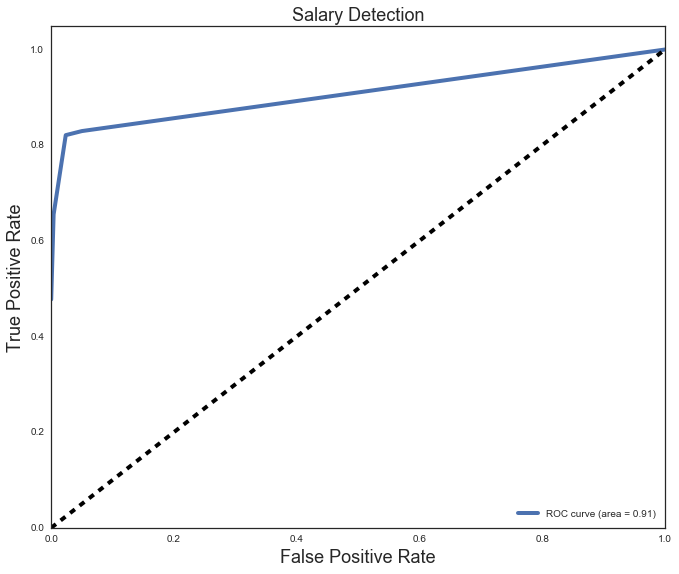

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = logreg.decision_function(X_test)
print Y_score

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Salary Detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [28]:
Status = df

In [29]:
Status['Status'] = Status['title'].map(lambda x: 1 if 'Senior' in x or 'Manager' in x or 'VP' in x or 'Vice President' in x or 'Director' in x or 'Sr.' in x else 0)

In [30]:
Status

,city,company,salary,summary,title,parsed_salary,Status
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000.0,0
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000.0,1
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000.0,0
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000.0,0
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000.0,0
5,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000.0,1
6,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000.0,0
7,San+Francisco,Brilent,"$130,000 a year","Perform large-scale data analysis, find intere...",Senior Data Scientist,130000.0,1
8,San+Francisco,HSF Consulting,"$160,000 a year",More data- they simply have more data than the...,Senior Data Scientist,160000.0,1
9,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000.0,0


#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [31]:
## YOUR CODE HERE

import patsy
from patsy import dmatrices
from sklearn.cross_validation import train_test_split

In [32]:
formula = 'Status ~ C(title) + parsed_salary'
ymat, xmat = patsy.dmatrices(formula, data=Status)

In [33]:
Status.columns[4:6]

Index([u'title', u'parsed_salary'], dtype='object')

In [34]:
dfData = Status[list(Status.columns[4:6])]
dfTarget = Status['Status']

In [35]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xmat, np.ravel(ymat), test_size=0.33, random_state = 77)
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(3208, 185)
(1581, 185)
(3208,)
(1581,)


In [36]:
logreg = LogisticRegression(random_state=77)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [37]:
y_score = logreg.score(x_test, np.ravel(y_test))
y_score

0.46932321315623021

In [38]:
from sklearn.metrics import confusion_matrix
# the input format is almost always (test, predict), but always check with documentation!
conmat = np.array(confusion_matrix(y_test, y_pred))

confusion = pd.DataFrame(conmat, index=['Contains Title', 'No Title'],
                          columns=['Contains Title', 'No Title'])

print(confusion)

                Contains Title  No Title
Contains Title               0       839
No Title                     0       742


#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

[ 0.10270306  0.07153638  0.99002699 ...,  0.03858527  0.07153649
  1.80379761]


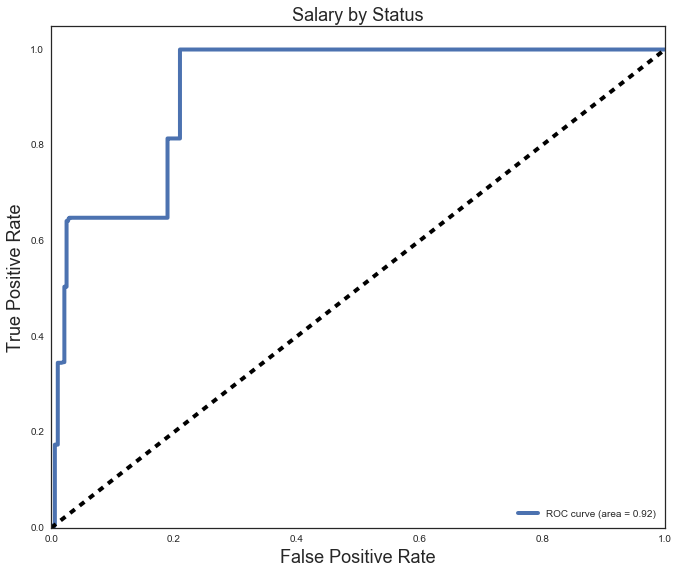

In [44]:
# YOUR CODE HERE # Refer to Week04, lesson 2.3
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


y_score = logreg.decision_function(x_test)
print y_score

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Salary by Status', fontsize=18)
plt.legend(loc="lower right")
plt.show()
#print "r^2:", model.score(x, y)

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.33)

logreg2 = LogisticRegression(penalty='l2')
logreg2.fit(X_train2, np.asarray(Y_train2, dtype=np.int64))
Y_pred2 = logreg2.predict(X_test2)

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [74]:
from sklearn.metrics import accuracy_score
print accuracy_score(Y_test.values.astype(int), Y_pred)

0.895635673624


In [61]:
from sklearn.metrics import classification_report

print(classification_report(Y_test.values.astype(int), Y_pred))

             precision    recall  f1-score   support

          0       0.83      0.98      0.90       760
          1       0.97      0.82      0.89       821

avg / total       0.91      0.90      0.90      1581



#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [41]:
## YOUR CODE HERE

In [42]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [43]:
## YOUR CODE HERE